3

In [1]:
import scipy.optimize as optimize
import numpy as np
import matplotlib.pyplot as plt

In [2]:
def func(xy):
    x, y = xy
    return np.sin(x)*np.sin(y)
optimize.minimize(func, (0.1, -0.1))

      fun: -0.9999999999982316
 hess_inv: array([[ 1.00047155e+00, -4.71428602e-04],
       [-4.71428602e-04,  1.00047131e+00]])
      jac: array([-1.33365393e-06,  1.32620335e-06])
  message: 'Optimization terminated successfully.'
     nfev: 27
      nit: 3
     njev: 9
   status: 0
  success: True
        x: array([ 1.57079498, -1.57079501])

In [3]:
xs = np.array([i for i in range(3)])
ys = np.array([i for i in range(3)])

In [4]:
def fsqr(x):
    return x*2 + 2*x + 1
optimize.minimize(fsqr, 0)

      fun: array([-6.62523069e+152])
 hess_inv: array([[2.74070385e+307]])
      jac: array([4.])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 7014
      nit: 46
     njev: 3507
   status: 2
  success: False
        x: array([-1.65630767e+152])

In [5]:
def sincos(x):
    return np.sin(x)*np.cos(x)


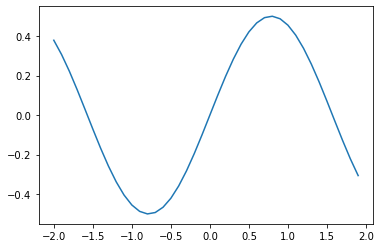

In [6]:
x = np.arange(-2,2,0.1)   # start,stop,step
y = np.sin(x) * np.cos(x)
plt.plot(x,y)
plt.show()

In [7]:
result = optimize.minimize(sincos,0)
result

      fun: -0.49999999999999994
 hess_inv: array([[0.50000095]])
      jac: array([0.])
  message: 'Optimization terminated successfully.'
     nfev: 12
      nit: 5
     njev: 6
   status: 0
  success: True
        x: array([-0.78539817])

In [8]:
result = optimize.minimize(func, (0.1, -0.1), method ="Powell")
result

   direc: array([[1., 0.],
       [0., 1.]])
     fun: -1.0
 message: 'Optimization terminated successfully.'
    nfev: 42
     nit: 2
  status: 0
 success: True
       x: array([ 1.57079633, -1.57079633])

Solve a nonlinear least-squares problem with bounds on the variables.

Given the residuals f(x) (an m-D real function of n real variables) and the loss function rho(s) (a scalar function), least_squares finds a local minimum of the cost function F(x):

In [ ]:
import numpy as np
def fun_rosenbrock(x):
    return np.array([10 * (x[1] - x[0]**2), (1 - x[0])])
   

Предоставляем только вектор остатков. 
Алгоритм строит функцию стоимости как сумму квадратов остатков

In [9]:
from scipy.optimize import least_squares
input = np.array([2, 2])
res = least_squares(fun_rosenbrock, input)

res

 active_mask: array([0., 0.])
        cost: 9.866924291084687e-30
         fun: array([4.44089210e-15, 1.11022302e-16])
        grad: array([-8.89288649e-14,  4.44089210e-14])
         jac: array([[-20.00000015,  10.        ],
       [ -1.        ,   0.        ]])
     message: '`gtol` termination condition is satisfied.'
        nfev: 3
        njev: 3
  optimality: 8.892886493421953e-14
      status: 1
     success: True
           x: array([1., 1.])

4
min_{x_0, x_1}: 100(x_0 - x_1^2)^2 + (1-x_0)^2
Функция Розенброка определен
[0, -0.5] , [1.0, 2.0]


 x_0^2 + x_1 <= 1 
 x_0^2 - x_1 <= 1 
 2x_0 + x_1 = 1 $
 x_0 + 2x_1 <= 1 
 0 <= x_0 <= 1 
 -0.5 <= x_1 <= 2.0 
 
 
 В нашем случае имеется единственное решение в точке $[x_0, x_1] = [0.4149, 0.1701]$, для которой справедливы только первое и четвертое ограничения.

In [10]:
from scipy.optimize import Bounds
import numpy as np
from scipy.optimize import LinearConstraint

bounds = Bounds ([0, -0.5], [1.0, 2.0])
linear_constraint = LinearConstraint ([[1, 2], [2, 1]], [-np.inf, 1], [1, 1])

from scipy.optimize import NonlinearConstraint

def cons_f(x):
     return [x[0]**2 + x[1], x[0]**2 - x[1]]

def cons_J(x):
     return [[2*x[0], 1], [2*x[0], -1]]

def cons_H(x, v):
     return v[0]*np.array([[2, 0], [0, 0]]) + v[1]*np.array([[2, 0], [0, 0]])

nonlinear_constraint = NonlinearConstraint(cons_f, -np.inf, 1, jac=cons_J, hess=cons_H)

from scipy.optimize import minimize
from scipy.optimize import rosen, rosen_der, rosen_hess, rosen_hess_prod

x0 = np.array([0.5, 0])
res = minimize(rosen, x0, method='trust-constr', jac=rosen_der, hess=rosen_hess,
                constraints=[linear_constraint, nonlinear_constraint],
                options={'verbose': 1}, bounds=bounds)
print(res.x)

`gtol` termination condition is satisfied.
Number of iterations: 12, function evaluations: 8, CG iterations: 7, optimality: 2.99e-09, constraint violation: 0.00e+00, execution time: 0.035 s.
[0.41494531 0.17010937]
